In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
%matplotlib inline

In [22]:
x=np.arange(-2,2,0.01)

In [23]:
y=X**2

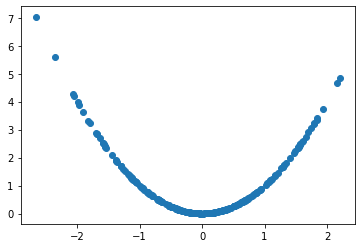

In [24]:
plt.scatter(X,y)

In [25]:
X.shape

(250, 1)

In [26]:
y.shape

(250, 1)

In [27]:
def get_w(query_point,X,tau):
    m=X.shape[0]
    W=np.mat(np.eye(m))
    for i in range(m):
        xi=X[i]
        x=query_point
        W[i,i]=np.exp(np.dot((xi-x),(xi-x).T)/(-2*tau*tau))
        
    return W

In [31]:
W=get_w(-1,X,100)
print(W)

[[0.99997958 0.         0.         ... 0.         0.         0.        ]
 [0.         0.99997638 0.         ... 0.         0.         0.        ]
 [0.         0.         0.99994265 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.99999989 0.         0.        ]
 [0.         0.         0.         ... 0.         0.999989   0.        ]
 [0.         0.         0.         ... 0.         0.         0.99991349]]


In [36]:
 def predict(X,Y,query_p,tau):
        M=X.shape[0]
        ones=np.ones((M,1))
        X_=np.hstack((X,ones))
        qx=np.mat([query_p,1])
        
        W=get_w(qx,X_,tau)
        
        theta=np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
        pred= np.dot(qx,theta)
        
        return theta,pred

In [37]:
theta,pred=predict(X,y,-1,0.2)
print(theta,pred)

[[-1.90951738]
 [-0.87245724]] [[1.03706014]]


# Visualise Prediction

In [50]:
def plot_predict(tau):
    X_test=np.linspace(-2,2,250)
    Y_test=[]
    for xq in X_test:
        theta,pred=predict(X,y,xq,tau)
        Y_test.append(pred[0][0])
        
    Y_test=np.array(Y_test)
    Xo=np.array(X)
    Yo=np.array(y)
    plt.title('Tau value is {}'.format(tau))
    plt.scatter(Xo,Yo)
    plt.scatter(X_test,Y_test,color='red')
    plt.show()

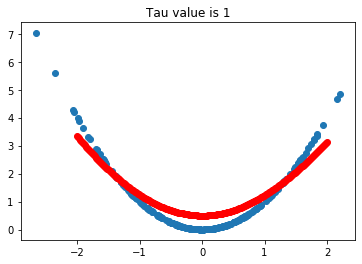

In [51]:
plot_predict(1)

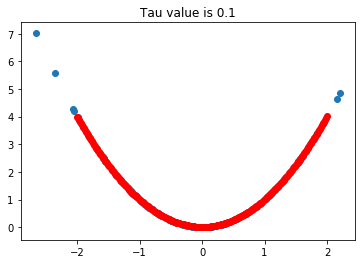

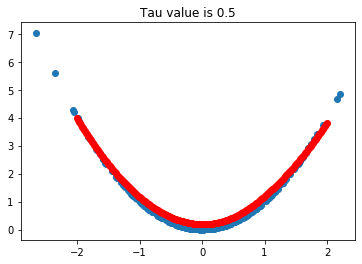

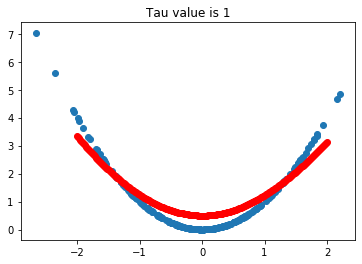

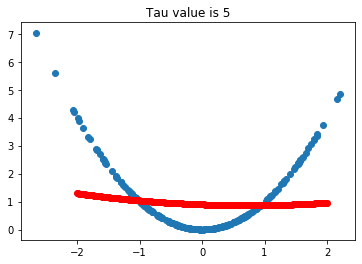

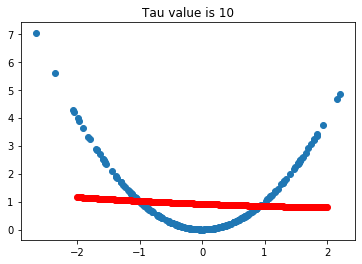

In [52]:
taus=[0.1,0.5,1,5,10]
for i in taus:
    plot_predict(i)